In [1]:
# Carga de librerías requeridas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Cargar archivos de datos

data = pd.read_table('db_data_rate_pull.dat', names=['s2','dm','ji'],delim_whitespace=True)

In [3]:
# Obtención del ji minímo de los datos y sus correspondientes parámetros de oscilación

s2_min = data.iloc[data['ji'].idxmin()][0]
dm_min = data.iloc[data['ji'].idxmin()][1]
ji_min = data.iloc[data['ji'].idxmin()][2]
s2_min, dm_min, ji_min

(0.08553852995673276, 0.0024842, 9.962261403590563)

In [4]:
# Restando el ji_min a la columna de ji
data['ji']=data['ji']-ji_min
data['ji'].min()

0.0

# Perfil ( $\Delta \chi^2$, $\sin^2 2\theta_{13}$)

In [5]:
# Obtención de datos para el perfil
s2_profile = data[data['dm']==dm_min][['s2','ji']]
parabol_s2 = pd.read_table("../daya_for_global_analysis/db_data/db_profile_s2.dat", names=['s2','ji'], delim_whitespace=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


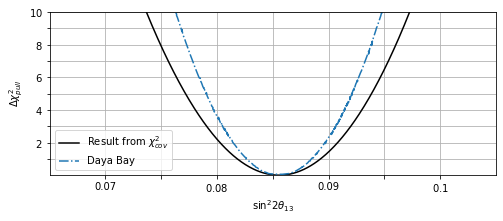

In [6]:
# Gráfica de (  Δ𝜒2 ,  sin22𝜃13 )
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(s2_profile['s2'].to_numpy(),s2_profile['ji'].to_numpy(),c='black',linestyle='-',label=r'Result from $\chi^2_{cov}$')
ax.plot(parabol_s2['s2'].to_numpy(),parabol_s2['ji'].to_numpy(),linestyle='-.',label=r'Daya Bay')

ax.legend()
ax.set_xlim(0.065, 0.105)
ax.set_ylim(0.0, 10)
ax.grid(True, linestyle='-')

ax.set_xticks([0.07,0.075,0.08,0.085,0.09,0.095,0.1])
ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['0.07','','$0.08$','','0.09','','$0.1$'])
ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta \chi^2_{pull}$')
fig.savefig("db_parabol_s22t13_pull.eps")

In [7]:
s2_profile.to_csv('db_pull_profile_s2.csv')

In [9]:
s2_left=0.08183118215016084
s2_right=0.08925859315786824

s2_sigma_left  = s2_min   - s2_left
s2_sigma_right = s2_right - s2_min

(s2_sigma_left,s2_sigma_right)

(0.00370734780657192, 0.003720063201135479)

In [ ]:
# (0.0036947958329506397, 0.00376823038797669)
